In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings("ignore")


font = {'family': 'normal',
        'size': 8}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.2
matplotlib.rcParams['xtick.major.width'] = 0.2
matplotlib.rcParams['ytick.major.width'] = 0.2
matplotlib.rcParams['axes.linewidth'] = 0.2

In [2]:
data_dir = "../../out_data/distance_evolution"
file_paths = glob(data_dir + "/*.csv")
file_paths = [fp for fp in file_paths if fp.split("/")[-1][:-4] != "dist_all" ]
file_paths.sort()

In [3]:
def plot_three(paths, save_path):
    dfs = [pd.read_csv(fp) for fp in paths]
    means = [df.mean(axis=0) for df in dfs]
    dfs = [df.transpose() for df in dfs]
    methods = [fp.split("/")[-1][:-4] for fp in paths]

    # panel 1    
    plt.figure(figsize=(14, 3))
    i = 0
    ax1 = plt.subplot(131)
    bp = plt.boxplot(dfs[i],patch_artist=True)# widths = 0.1)
    plt.xticks(range(0,31,5), range(0,31,5))
    #plt.xlabel("Order of selected samples\na")
    plt.ylabel("Distance between consecutive points")
    plt.title(methods[i])
    ax1.set_xlim(-1, 31)
    plt.axhline(y=np.mean(dfs[i].values), color='r', linestyle='--', linewidth=0.5)

    elements = bp.keys()
    for element in elements:
        for box in bp[element]:
            box.set(linewidth = 0.4, color="#BC9FA8")

    plt.setp(bp['fliers'], marker='.',markersize=1)

        
    # plot a fitting line    
    dist_mean = np.median(dfs[0], axis = 1)
    turning_point = 10
    
    # plot the first half 
    x = np.array([i+0 for i in range(len(dist_mean[:turning_point]))])
    y = dist_mean[:turning_point]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x+1, x*m + b,color='k', linewidth = 0.6)
    
    x = np.array([i+0 for i in range(len(dist_mean[turning_point:]))])
    y = dist_mean[turning_point:]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x+turning_point+1, x*m + b,color='k', linewidth = 0.6)

    # panel 2
    i = 1  
    ax2 = plt.subplot(132, sharey = ax1)
    bp = plt.boxplot(dfs[i],patch_artist=True)
    plt.xticks(range(0,31,5), range(0,31,5))
    #plt.xlabel("Order of selected samples\nb")
    plt.title(methods[i])
    ax2.set_xlim(-1, 31)

    elements = bp.keys()
    for element in elements:
        for box in bp[element]:
            box.set(linewidth = 0.4, color="#39B071")

    plt.setp(bp['fliers'], marker='.',markersize=1)

    
    plt.axhline(y=np.mean(dfs[i].values), color='r', linestyle='--', linewidth=0.5)

    # plot the fitting line
    dist_mean = np.median(dfs[1], axis = 1)
    turning_point = 10
    
    # plot the first half 
    x = np.array([i+0 for i in range(len(dist_mean[:turning_point]))])
    y = dist_mean[:turning_point]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x+1, x*m + b,color='k', linewidth = 0.6)
    
    x = np.array([i+0 for i in range(len(dist_mean[turning_point:]))])
    y = dist_mean[turning_point:]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x+turning_point+1, x*m + b,color='k',  linewidth = 0.6)
    
    #panel 3
    i=2
    ax3 = plt.subplot(133, sharey = ax2)
    bp = plt.boxplot(dfs[i],patch_artist=True)
    plt.xticks(range(0,31,5), range(0,31,5))
    #plt.xlabel("Order of selected samples\nc")
    plt.title(methods[i])
    ax3.set_xlim(-1, 31)
    plt.axhline(y=np.mean(dfs[i].values), color='r', linestyle='--', linewidth=0.5)

    elements = bp.keys()
    for element in elements:
        for box in bp[element]:
            box.set(linewidth = 0.4, color="#E0BB28")

    plt.setp(bp['fliers'], marker='.',markersize=1)
    plt.savefig(save_path,bbox_inches='tight')
    plt.show()
    plt.close()
    plt.clf()
    return dfs

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


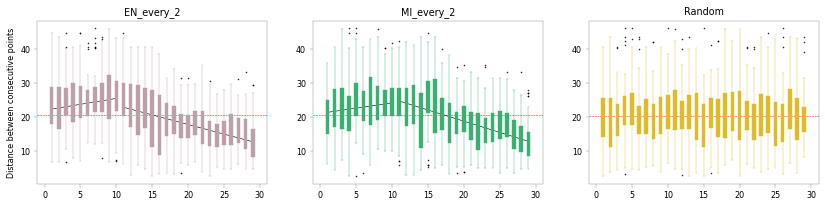

<Figure size 432x288 with 0 Axes>

In [4]:
paths = [fp  for fp in file_paths if "every_2" in fp or "Random" in fp]
save_path = "../../out_fig/distance_evolve/distance_evolve_not_PC.pdf"
dfs = plot_three(paths, save_path)

In [5]:
file_paths

['../../out_data/distance_evolution/EN_every_1.csv',
 '../../out_data/distance_evolution/EN_every_2.csv',
 '../../out_data/distance_evolution/EN_every_3.csv',
 '../../out_data/distance_evolution/MI_every_1.csv',
 '../../out_data/distance_evolution/MI_every_2.csv',
 '../../out_data/distance_evolution/MI_every_3.csv',
 '../../out_data/distance_evolution/Random.csv']